In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
parks = pd.read_csv("derived_data/parks.csv",low_memory=False).drop_duplicates();
species = pd.read_csv("derived_data/species.csv").drop_duplicates();
visits = pd.read_csv("derived_data/visits.csv").drop_duplicates();

In [66]:
species = species[species["Occurrence"]=="Present"]
speciesCount = species.groupby('ScientificName')['ParkName'].count().sort_values(ascending=False).to_frame(name='count').reset_index()

In [67]:
speciesCount['Unique'] = speciesCount['count']==1

In [68]:
uniqueSpeciesParkData = pd.merge(species[['ParkName','ScientificName']],speciesCount[['ScientificName','Unique']],on="ScientificName")

In [69]:
uniqueCount = uniqueSpeciesParkData.groupby('ParkName')['ScientificName'].count().sort_values(ascending=False).to_frame(name='uniqueSpeciesCount').reset_index()

In [70]:
fullData = pd.merge(uniqueCount.reset_index(),visits,on="ParkName")

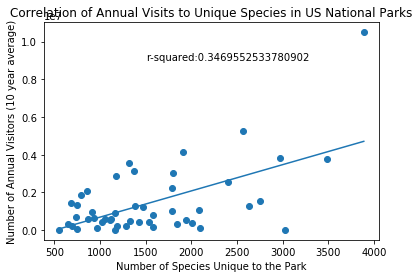

In [71]:
x = fullData['uniqueSpeciesCount']
y = fullData['Avg10YrVisits']
plt.scatter(x,y)
plt.xlabel("Number of Species Unique to the Park")
plt.ylabel("Number of Annual Visitors (10 year average)")
plt.title("Correlation of Annual Visits to Unique Species in US National Parks")
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)
r_squared = np.corrcoef(x,y)[0,1]**2
plt.text(1500,9000000,"r-squared:{}".format(r_squared))
plt.savefig('figures/uniqueSpeciesVisits.png')